<a href="https://colab.research.google.com/github/timothy2077/My-Rolyal-Suite-Chatbot/blob/main/PP_H_%EC%B9%B4%EC%B9%B4%EC%98%A4%ED%86%A1%EC%97%90_AI_Chatbot_%EB%A7%8C%EB%93%A4%EA%B8%B0_101024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. 카카오 채널 개설하기

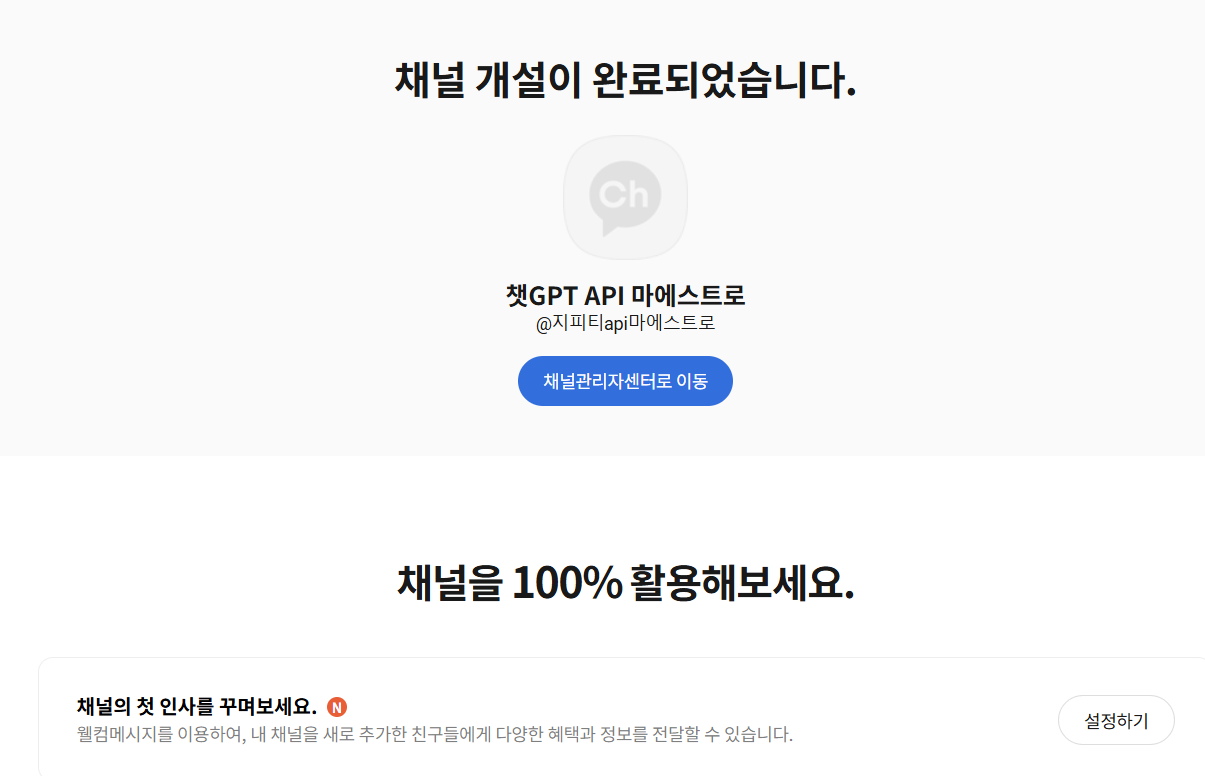

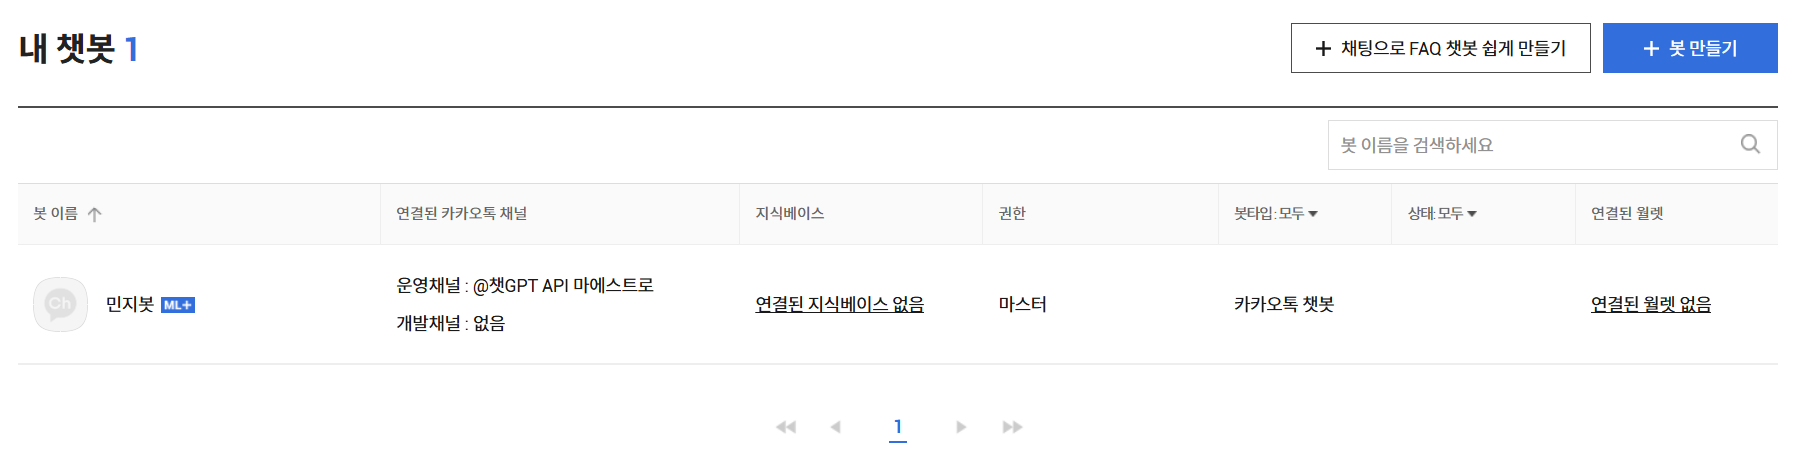

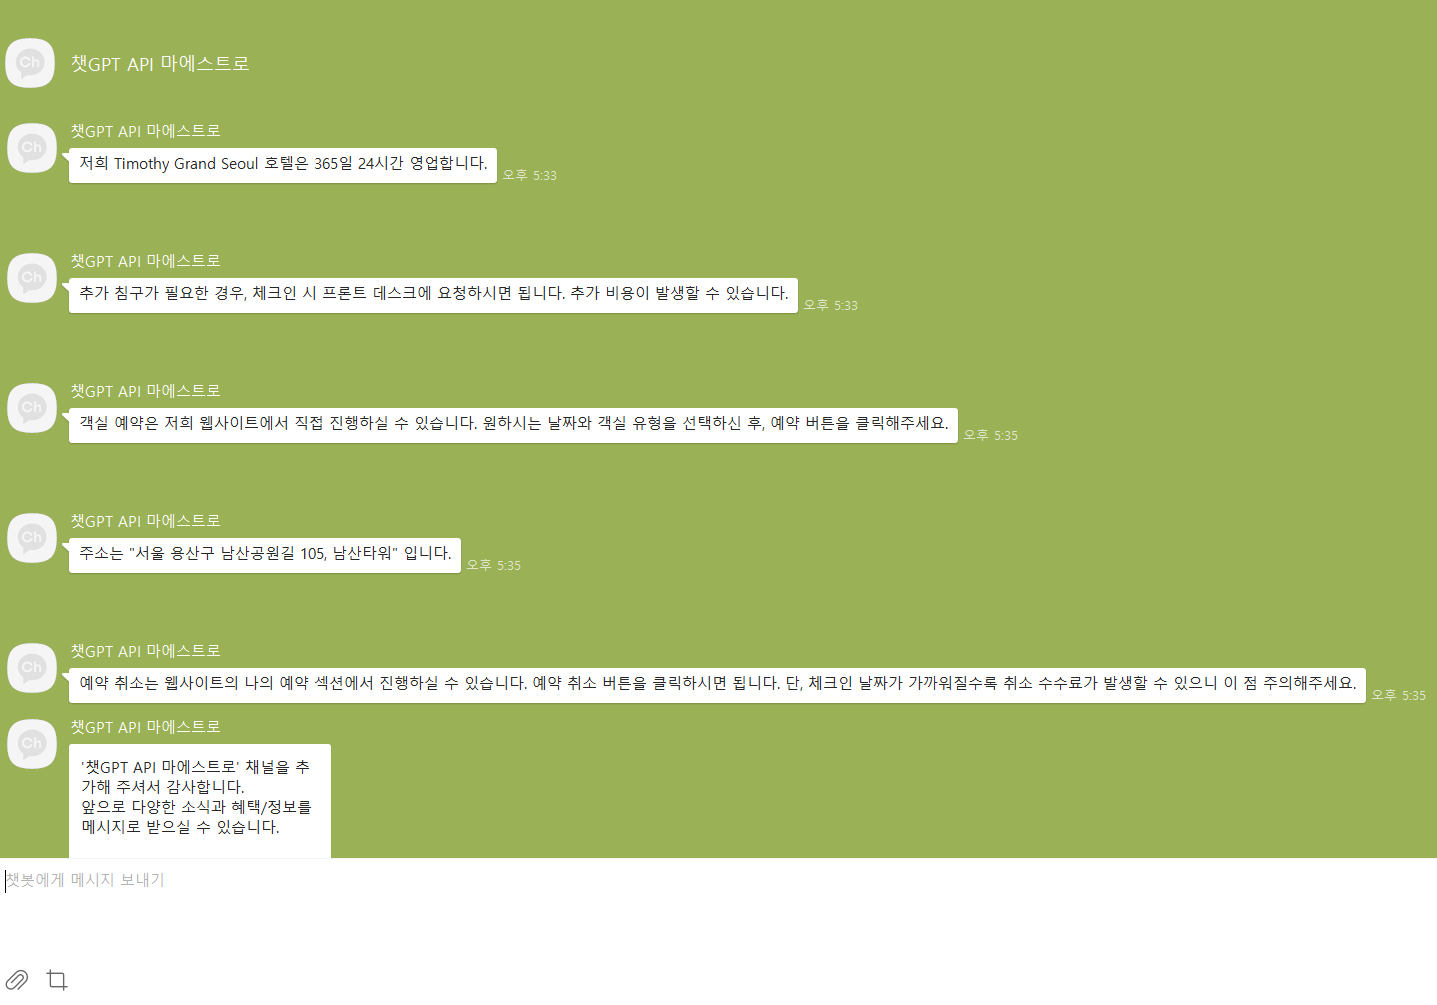

# B. 개인 랩탑을 활용하여 카카오톡 챗봇 만들기

In [ ]:
pip install fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 2.1 MB/s eta 0:00:00


In [ ]:
pip install nest_asyncio


In [ ]:
import json
from fastapi import FastAPI, Request
from pydantic import BaseModel
import uvicorn
import nest_asyncio

# FastAPI 인스턴스 생성
app = FastAPI()

# nest_asyncio 설치 및 적용
nest_asyncio.apply()

# 카카오톡 챗봇 응답을 위한 Pydantic 모델 생성
class KakaoMessage(BaseModel):
    userRequest: dict
    bot: dict
    action: dict

# 기본 엔드포인트 생성
@app.get("/")
def read_root():
    return {"message": "Welcome to KakaoTalk Chatbot Server"}

# 카카오톡 챗봇에서 POST 요청을 받는 엔드포인트
@app.post("/kakao")
async def kakao_chatbot(request: Request):
    body = await request.json()  # 요청 본문을 JSON 형식으로 변환

    # 사용자가 보낸 메시지 확인
    user_message = body['userRequest']['utterance']

    # 카카오톡 챗봇에 보낼 응답 메시지
    response = {
        "version": "2.0",
        "template": {
            "outputs": [
                {
                    "simpleText": {
                        "text": f"당신이 보낸 메시지: {user_message}"
                    }
                }
            ]
        }
    }

    return response

# FastAPI 서버 실행 (Jupyter/Colab에서 테스트할 경우 uvicorn 사용)
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)


INFO:     Started server process [784]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [784]


In [ ]:
!pip install fastapi nest_asyncio pyngrok uvicorn


In [ ]:
!pip install fastapi nest_asyncio pyngrok uvicorn  # 패키지 설치

import json
from fastapi import FastAPI, Request
from pydantic import BaseModel
import uvicorn
import nest_asyncio
from pyngrok import ngrok

# FastAPI 인스턴스 생성
app = FastAPI()

# nest_asyncio 적용
nest_asyncio.apply()

# ngrok 인증 토큰 설정
ngrok.set_auth_token("2jGxybloP8p5OV8k0K69QwVbKUb_2qUVUamjWhoBjih8tjKTL")

# ngrok으로 터널 생성
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# 카카오톡 챗봇 응답을 위한 Pydantic 모델 생성
class KakaoMessage(BaseModel):
    userRequest: dict
    bot: dict
    action: dict

# 기본 엔드포인트 생성
@app.get("/")
def read_root():
    return {"message": "Welcome to KakaoTalk Chatbot Server"}

# 카카오톡 챗봇에서 POST 요청을 받는 엔드포인트
@app.post("/kakao")
async def kakao_chatbot(request: Request):
    body = await request.json()  # 요청 본문을 JSON 형식으로 변환

    # 사용자가 보낸 메시지 확인
    user_message = body['userRequest']['utterance']

    # 카카오톡 챗봇에 보낼 응답 메시지
    response = {
        "version": "2.0",
        "template": {
            "outputs": [
                {
                    "simpleText": {
                        "text": f"당신이 보낸 메시지: {user_message}"
                    }
                }
            ]
        }
    }

    return response

# FastAPI 서버 실행
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)


Public URL: NgrokTunnel: "https://9d91-34-19-123-136.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [784]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     223.38.73.90:0 - "GET / HTTP/1.1" 200 OK
INFO:     219.249.231.40:0 - "POST /chat HTTP/1.1" 404 Not Found
INFO:     219.249.231.40:0 - "POST /chat HTTP/1.1" 404 Not Found
INFO:     219.249.231.42:0 - "POST /chat/ HTTP/1.1" 404 Not Found
INFO:     219.249.231.42:0 - "POST /chat/ HTTP/1.1" 404 Not Found


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [784]


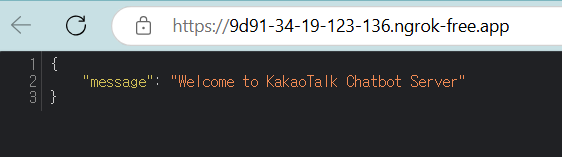

### 카카오톡 챗봇 관리자 센터에에서 카카오톡 서버와 로컬 서버 연결하기


In [ ]:
!pip install fastapi nest_asyncio pyngrok uvicorn  # 패키지 설치

import json
from fastapi import FastAPI, Request
from pydantic import BaseModel
import uvicorn
import nest_asyncio
from pyngrok import ngrok

# FastAPI 인스턴스 생성
app = FastAPI()

# nest_asyncio 적용
nest_asyncio.apply()

# ngrok 인증 토큰 설정
ngrok.set_auth_token("2jGxybloP8p5OV8k0K69QwVbKUb_2qUVUamjWhoBjih8tjKTL")

# ngrok으로 터널 생성
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# 카카오톡 챗봇 응답을 위한 Pydantic 모델 생성
class KakaoMessage(BaseModel):
    userRequest: dict
    bot: dict
    action: dict

# 기본 엔드포인트 생성
@app.get("/")
def read_root():
    return {"message": "Welcome to KakaoTalk Chatbot Server"}

# 카카오톡 챗봇에서 POST 요청을 받는 엔드포인트
@app.post("/kakao")
async def kakao_chatbot(request: Request):
    body = await request.json()  # 요청 본문을 JSON 형식으로 변환

    # 사용자가 보낸 메시지 확인
    user_message = body['userRequest']['utterance']

    # 카카오톡 챗봇에 보낼 응답 메시지
    response = {
        "version": "2.0",
        "template": {
            "outputs": [
                {
                    "simpleText": {
                        "text": f"당신이 보낸 메시지: {user_message}"
                    }
                }
            ]
        }
    }

    return response

# 새로운 /kakao/skill 엔드포인트 추가
@app.post("/kakao/skill")
async def kakao_skill(request: Request):
    body = await request.json()  # 요청 본문을 JSON 형식으로 변환

    # 사용자가 보낸 메시지 확인
    user_message = body['userRequest']['utterance']

    # 처리 로직 (예시: 메시지를 역으로 출력)
    response = {
        "version": "2.0",
        "template": {
            "outputs": [
                {
                    "simpleText": {
                        "text": f"Skill 엔드포인트에서 받은 메시지: {user_message}"
                    }
                }
            ]
        }
    }

    return response

# FastAPI 서버 실행
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /usr/local/lib/python3.10/dist-packages/uvicorn/server.py:67> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/lib/python3.10/asyncio/tasks.py", l

Public URL: NgrokTunnel: "https://28c2-34-19-123-136.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [784]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     223.38.73.90:0 - "GET / HTTP/1.1" 200 OK
INFO:     219.249.231.42:0 - "POST /chat/ HTTP/1.1" 404 Not Found
INFO:     219.249.231.40:0 - "POST /kakao/skill HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [784]


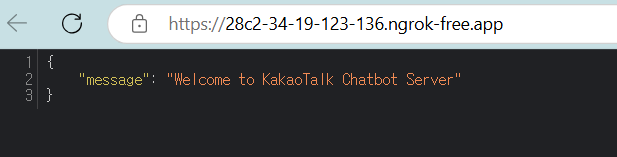

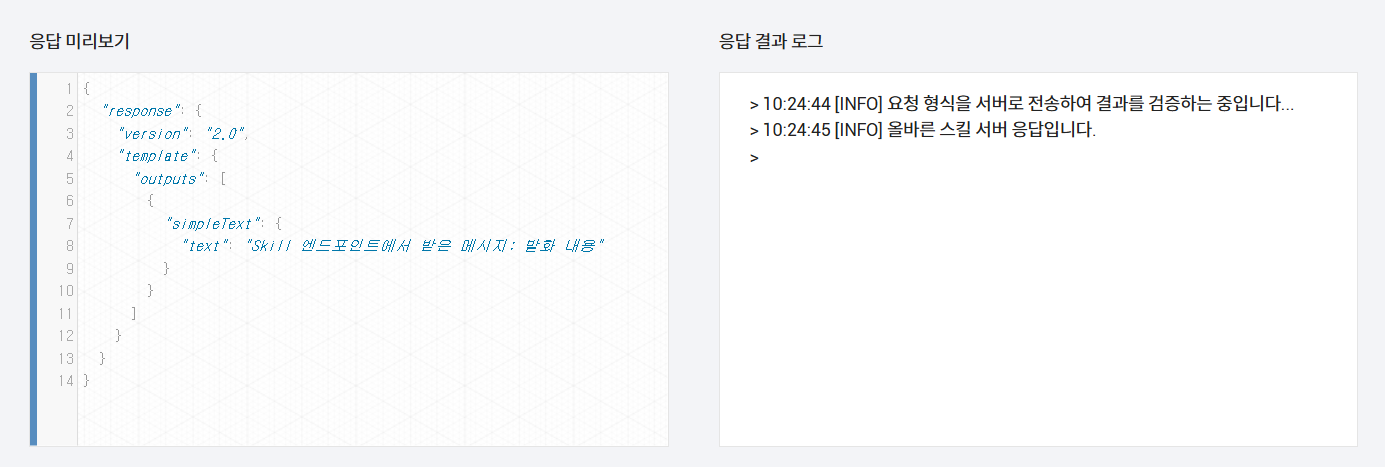

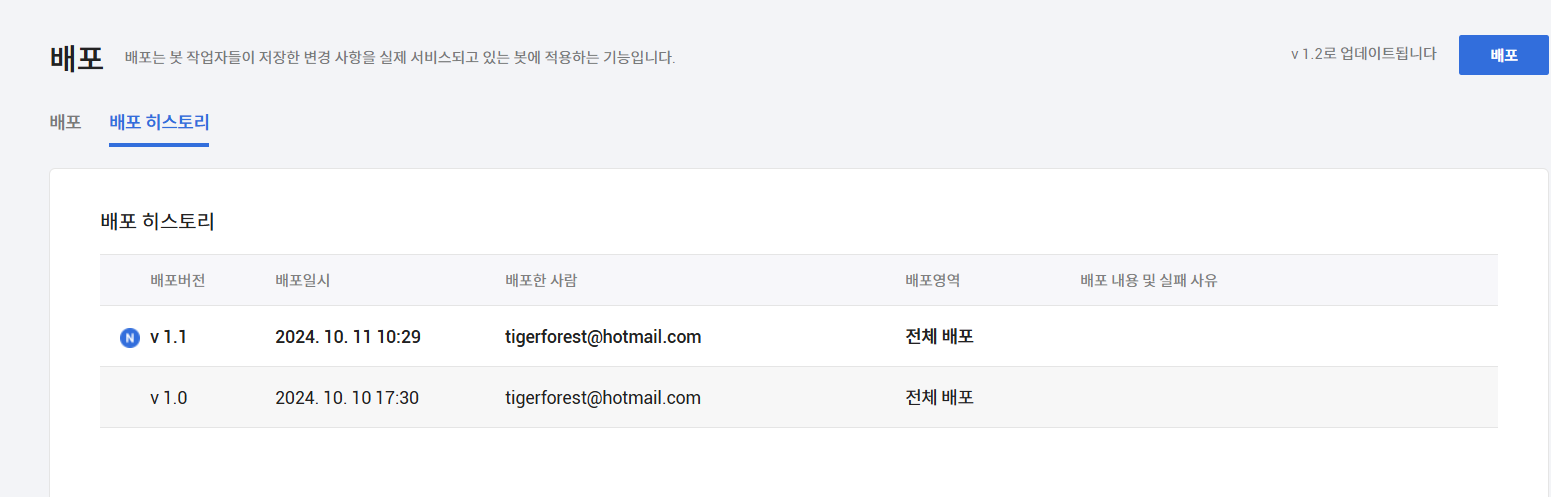

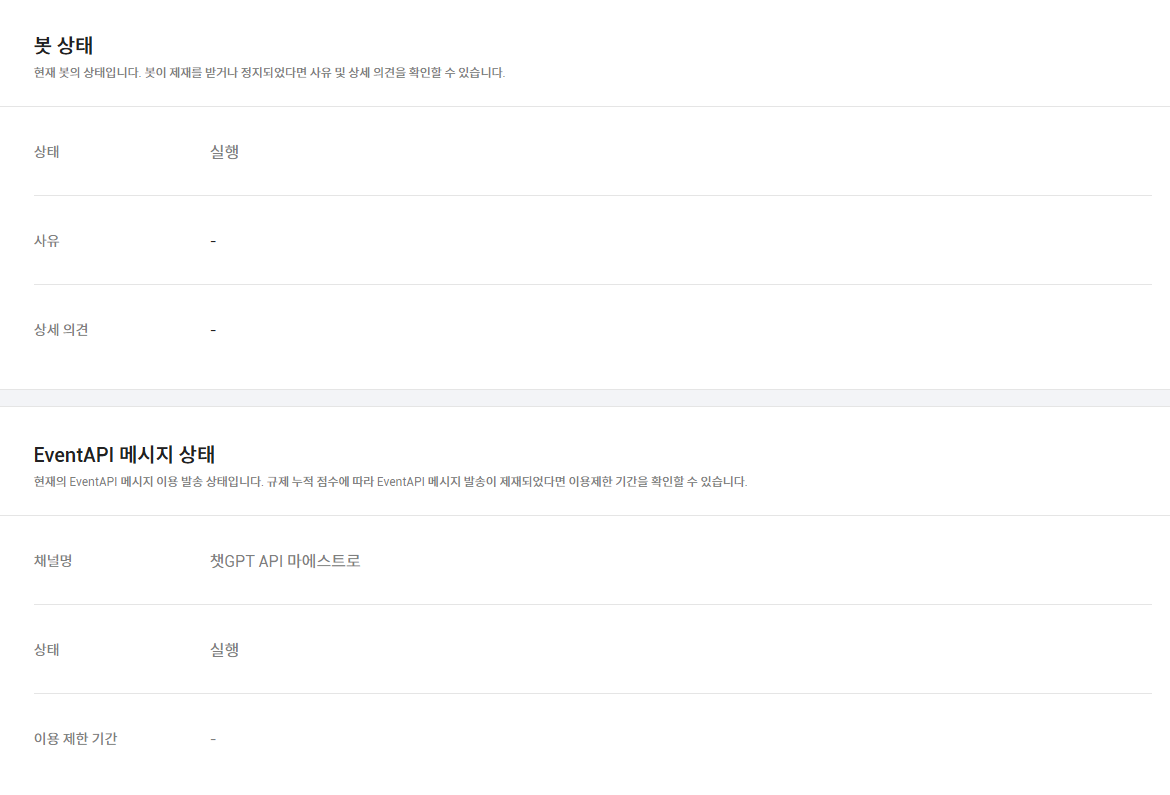